In [3]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from PLAsTiCC_utils import *
from LightCurve import LightCurve

In [4]:
all_object_ids = extract_all_ids()
kilonova_ids=extract_kilonova_ids()
print(kilonova_ids)

[    62187    139362   1573501   3572446   4311960   4539153   5102349
   6460481  11574036  11742403  11904502  13537416  15897952  16173841
  16452890  17116737  17958346  19183060  20539244  22245279  23798919
  26684850  27883625  31292040  31563138  33065798  35411122  35630788
  39745050  44564061  44864629  46213566  46489715  46553925  47142591
  48098969  49519074  49850869  50120780  51527253  54000531  56942944
  59364010  59464880  59698197  61543226  61688145  66740787  67195030
  67600070  70425954  74492858  74512775  74943698  75080064  75218022
  76457103  80913604  81456459  84706583  85030920  86490974  89733353
  89942025  90269218  93121505  93394704  93725998  95541281  96619113
  97214939  97639845  97765302  99449747 102551107 102599855 103258429
 103989029 105385367 107129776 108253858 108305965 110808232 113330500
 113678572 113851505 114467134 115381923 115713701 118230321 119260275
 120794836 120845357 121016694 121257780 121326699 122963326 124687561
 12555

In [5]:
df = load_data()
#print(df.type())

In [6]:
df_meta_data = load_metadata()

In [7]:
df_meta_data['ddf']

1
1
1
1
1
1
1
1
1
1
1


# Distribution of Flux

[0 1 2 3 4 5]


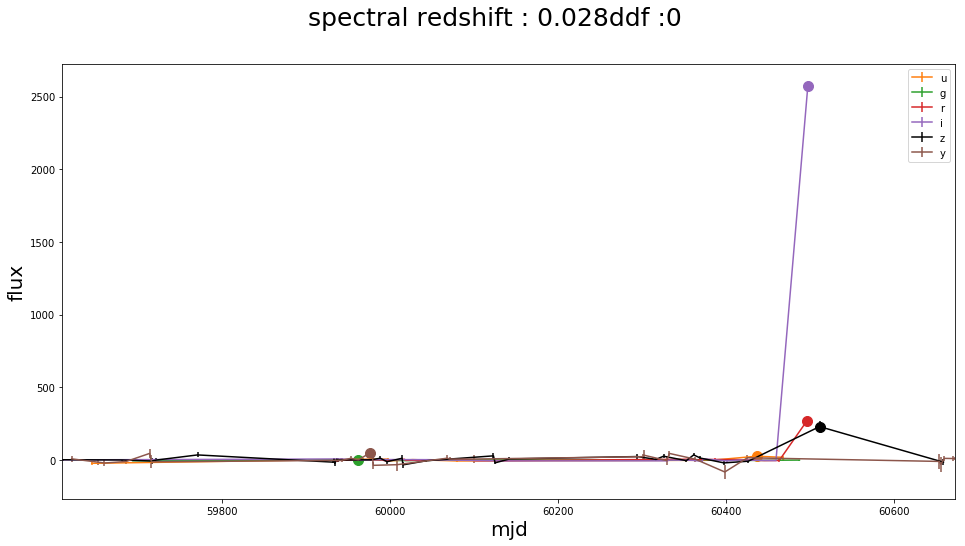

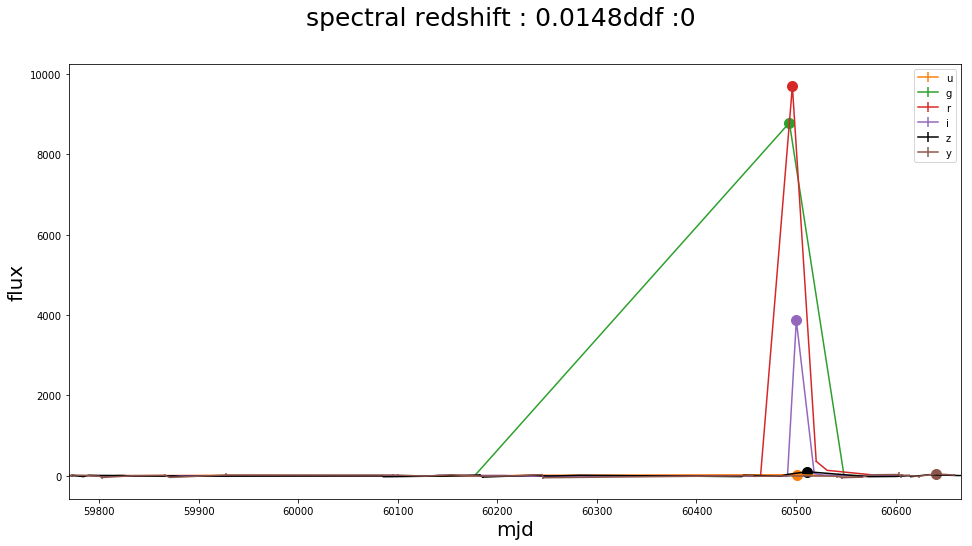

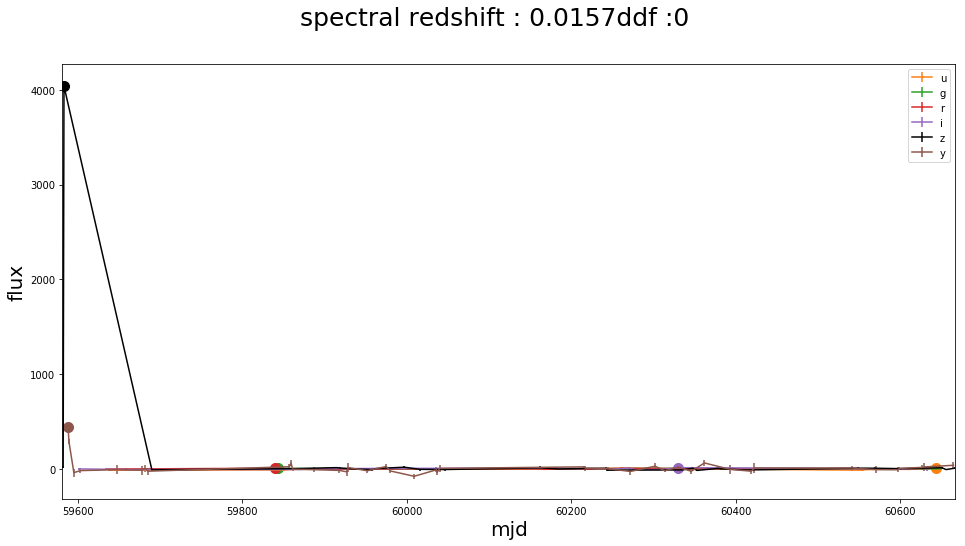

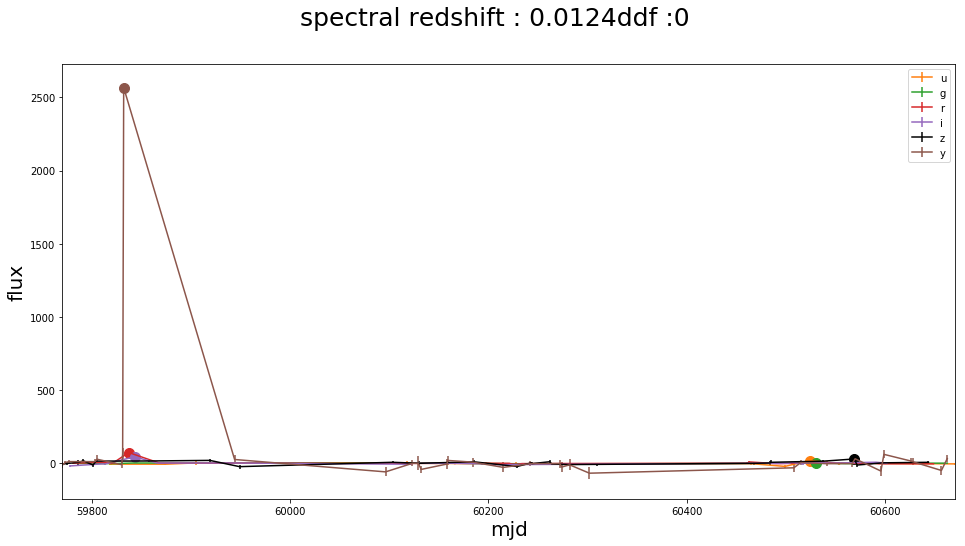

In [8]:
pass_bands = np.arange(0,6)
band_maximum_arr = [[]]

print(pass_bands)

for i, object_id in enumerate(kilonova_ids):
    mask = df['object_id'] == object_id
    object_df = df[mask]
    global_max_flux_index = np.argmax(object_df['flux'])
    global_max_flux_date = object_df['mjd'][global_max_flux_index]
    if object_df['flux'][global_max_flux_index]>1500:
        #lc = LightCurve(object_df)
        lc = LightCurve(df[mask],"mjd","flux","flux_err","passband")
        fig=lc.plot_single_band_curve()
        red_shift,_ = getredshift(object_id)
        ddf = getddf(object_id)
        fig.suptitle("spectral redshift : "+ str(red_shift[0])+ "ddf :" +str(ddf[0]), fontsize=25)
        fig.savefig("./kilonova_curves/highest_flux_curves_"+str(object_id))
        plt.show()
        
    min_date = global_max_flux_date-50
    max_date = global_max_flux_date+50
    for band  in pass_bands:
        if band<len(band_maximum_arr):
            band_maximum_arr.append([])
        band_mask = object_df['passband'] == band 
        date_mask = (object_df['mjd']>min_date)&(object_df['mjd']<max_date)
        final_mask = band_mask*date_mask
        band_data = object_df[final_mask]
        if len(band_data['flux']) != 0:
            max_band_flux = np.amax(band_data['flux'])
            if max_band_flux>0: 
                band_maximum_arr[band].append(max_band_flux)   

936.914185
8784.317383
9694.985352
3866.910156
4039.384033
2567.308838


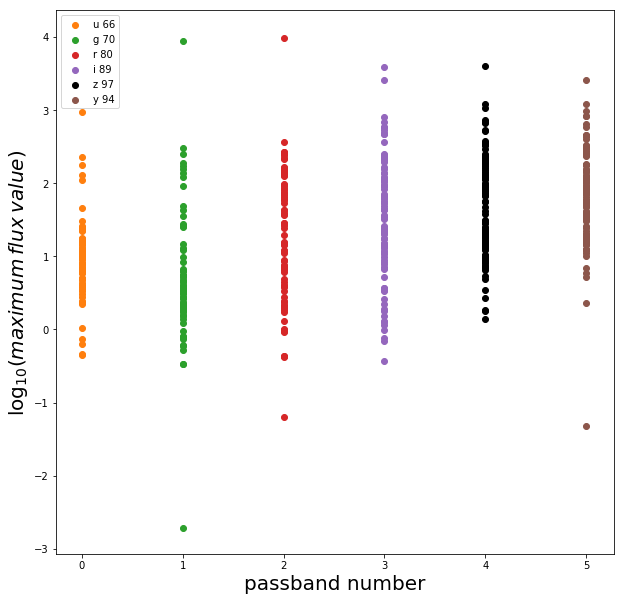

In [9]:
pass_band_dict={0: 'C1', 1: 'C2', 2: 'C3', 3: 'C4', 4: 'k', 5: 'C5'}
pb_names=['u', 'g', 'r', 'i', 'z', 'y']
fig = plt.figure(figsize=(10,10))
for i in range(6):
    x = np.zeros(len(band_maximum_arr[i]))+i
    #print(x.size)
    print(np.amax(band_maximum_arr[i]))
    plt.scatter(x,np.log10(band_maximum_arr[i]),color = pass_band_dict[i],label=pb_names[i]+" "+str(len(band_maximum_arr[i])))
plt.xlabel("passband number",fontsize=20)
plt.ylabel(r'$\log_{10}{(maximum\:flux\:value)}$',fontsize=20)
plt.legend()
plt.savefig("./distribution_of_maximum_values")
plt.show()
plt.close('all')

# Distribution of redshift

In [10]:
df_meta_data = load_metadata()
kilonova_redshift = df_meta_data['hostgal_specz'][np.where(df_meta_data['target']==64)]

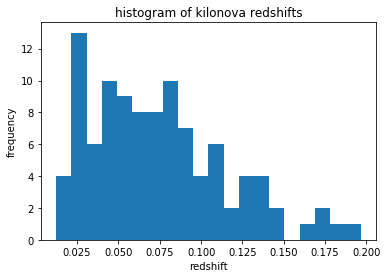

In [11]:
fig = plt.figure()
plt.hist(kilonova_redshift,bins=20)
plt.xlabel("redshift")
plt.ylabel("frequency")
plt.title("histogram of kilonova redshifts")
fig.savefig("./Distribution_of_redshifts")
plt.show()